## Exploratory plots of narwhal acoustic presence and environmental data

In [4]:
import numpy as np
import pandas as pd
import xarray as xr
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime

In [72]:
# import narwhal acoustic detection data
detections_dir = "D:/Habitat_model_data/narwhal_detections/"

# Kong Oscar 2019 data - ST and AURAL
KO19_narwhal_ST_det    = pd.read_csv(detections_dir + 'Nuussuaq_KongOscar_ST_daily.csv')
KO19_narwhal_aural_det = pd.read_csv(detections_dir + 'Nuussuaq_KongOscar_AuralM2_daily.csv')

# Rink 2018 - AURAL
rink18_narwhal_aural_det = pd.read_csv(detections_dir + 'Rink_Glacier_2018-19_AuralM2_daily.csv')

# Fisher Islands/Rink - ST and AURAL
fisher19_narwhal_ST_det    = pd.read_csv(detections_dir + 'Rink_Glacier_Fischer_ST_daily.csv')
fisher19_narwhal_aural_det = pd.read_csv(detections_dir + 'Rink_Glacier_Fischer_AuralM2_daily.csv')

In [73]:
def csv_to_datetime(detections_csv):
    date_time_str = detections_csv['Time_UTC'].tolist()
    dates = []
    for date in date_time_str:
        tmp = datetime.strptime(date, '%Y/%b/%d %H:%M:%S')
        dates.append(np.datetime64(tmp))
    dates_array = np.array(dates)
    return dates_array

### Kong Oscar

In [74]:
KO_ST_dates_array = csv_to_datetime(KO19_narwhal_ST_det)
KO_ST_narwhal_det_array = KO19_narwhal_ST_det['narwhal'].to_numpy()

KO_ST_narwhal_dates = KO_ST_dates_array[KO_ST_narwhal_det_array == 1] # identify dates when narwhal were detected

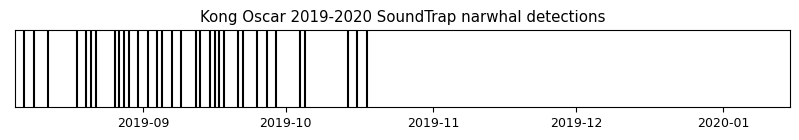

In [5]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 9

for xcoord in KO_ST_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(KO_ST_dates_array[0], KO_ST_dates_array[-1])
plt.yticks([])
plt.title('Kong Oscar 2019-2020 SoundTrap narwhal detections');

In [76]:
KO_aural_dates_array = csv_to_datetime(KO19_narwhal_aural_det)
KO_aural_narwhal_det_array = KO19_narwhal_aural_det['narwhal'].to_numpy()

KO_aural_narwhal_dates = KO_aural_dates_array[KO_aural_narwhal_det_array == 1] # identify dates when narwhal were detected

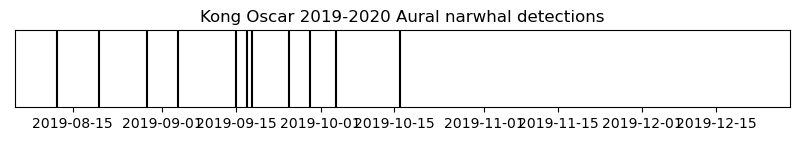

In [9]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 10

for xcoord in KO_aural_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(KO_aural_dates_array[0], KO_aural_dates_array[-1])
plt.yticks([])
plt.title('Kong Oscar 2019-2020 Aural narwhal detections');

In [78]:
KO_ST_dates_array[0]

numpy.datetime64('2019-08-05T00:00:00.000000')

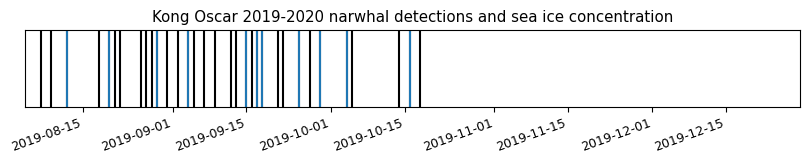

In [89]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 9

for xcoord in KO_ST_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
# plt.xlim(KO_ST_dates_array[0], KO_ST_dates_array[-1])
for xcoord in KO_aural_narwhal_dates:
    plt.axvline(x=xcoord, color='tab:blue') 
plt.xlim(KO_aural_dates_array[0], KO_aural_dates_array[-1])
plt.xticks(rotation = 20, horizontalalignment='right')
plt.yticks([])
plt.title('Kong Oscar 2019-2020 narwhal detections and sea ice concentration');

### Rink

In [95]:
rink_aural_dates_array = csv_to_datetime(rink18_narwhal_aural_det)
rink_aural_narwhal_det_array = rink18_narwhal_aural_det['narwhal'].to_numpy()

rink_aural_narwhal_dates = rink_aural_dates_array[rink_aural_narwhal_det_array == 1] # identify dates when narwhal were detected

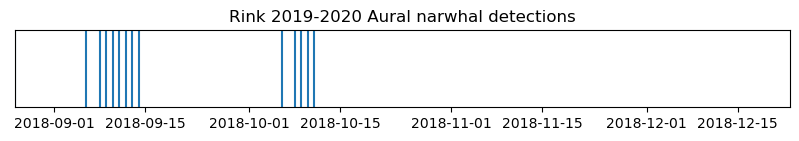

In [96]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 10

for xcoord in rink_aural_narwhal_dates:
    plt.axvline(x=xcoord, color='tab:blue') 
plt.xlim(rink_aural_dates_array[0], rink_aural_dates_array[-1])
plt.yticks([])
plt.title('Rink 2019-2020 Aural narwhal detections');

### Fisher Islands

In [105]:
fisher_ST_dates_array = csv_to_datetime(fisher19_narwhal_ST_det)
fisher_ST_narwhal_det_array = fisher19_narwhal_ST_det['narwhal'].to_numpy()

fisher_ST_narwhal_dates = fisher_ST_dates_array[fisher_ST_narwhal_det_array == 1] # identify dates when narwhal were detected

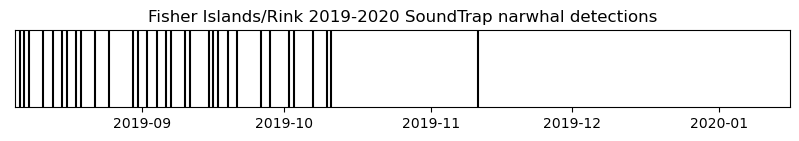

In [106]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 10

for xcoord in fisher_ST_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(fisher_ST_dates_array[0], fisher_ST_dates_array[-1])
plt.yticks([])
plt.title('Fisher Islands/Rink 2019-2020 SoundTrap narwhal detections');

In [107]:
fisher_aural_dates_array = csv_to_datetime(fisher19_narwhal_aural_det)
fisher_aural_narwhal_det_array = fisher19_narwhal_aural_det['narwhal'].to_numpy()

fisher_aural_narwhal_dates = fisher_aural_dates_array[fisher_aural_narwhal_det_array == 1] # identify dates when narwhal were detected

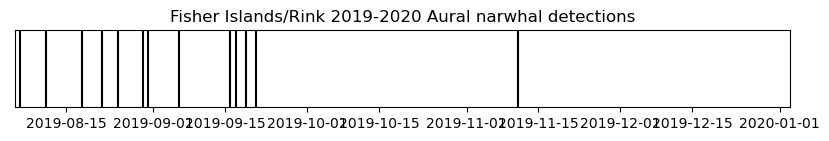

In [108]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 10

for xcoord in fisher_aural_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(fisher_aural_dates_array[0], fisher_aural_dates_array[-1])
plt.yticks([])
plt.title('Fisher Islands/Rink 2019-2020 Aural narwhal detections');

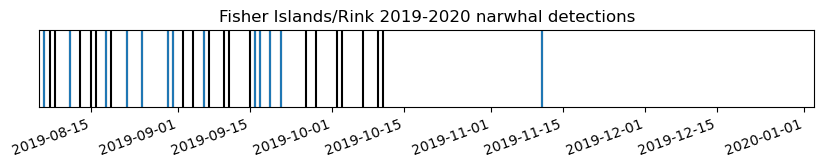

In [111]:
plt.rcParams["figure.figsize"] = (10,1)
plt.rcParams['font.size'] = 10

for xcoord in fisher_ST_narwhal_dates:
    plt.axvline(x=xcoord, color='k') 
plt.xlim(fisher_ST_dates_array[0], fisher_ST_dates_array[-1])
for xcoord in fisher_aural_narwhal_dates:
    plt.axvline(x=xcoord, color='tab:blue') 
plt.xlim(fisher_aural_dates_array[0], fisher_aural_dates_array[-1])
plt.yticks([])
plt.xticks(rotation = 20, horizontalalignment='right')
plt.title('Fisher Islands/Rink 2019-2020 narwhal detections');

In [21]:
print(KO_ST_narwhal_det_array.sum())
print(KO_aural_narwhal_det_array.sum())
print(fisher_ST_narwhal_det_array.sum())
print(fisher_aural_narwhal_det_array.sum())
print(rink_aural_narwhal_det_array.sum())

33
11
32
13
14


### Plot glacier length and area

In [10]:
# Plot glacier data from Taryn - csv spreadsheet
glacier_annual_xl = pd.ExcelFile("D:/Habitat_model_data/glacier_terminus/glacier_data.xlsx")
glacier_seasonal_xl = pd.ExcelFile("D:/Habitat_model_data/glacier_terminus/glacier_data_seasonal.xlsx")

print(glacier_seasonal_xl.sheet_names)

sver_annual_df = glacier_annual_xl.parse(glacier_annual_xl.sheet_names[0])
ko_annual_df   = glacier_annual_xl.parse(glacier_annual_xl.sheet_names[1])
rink_annual_df = glacier_annual_xl.parse(glacier_annual_xl.sheet_names[2])

sver_seasonal_df = glacier_seasonal_xl.parse(glacier_seasonal_xl.sheet_names[0])
ko_seasonal_df   = glacier_seasonal_xl.parse(glacier_seasonal_xl.sheet_names[1])
rink_seasonal_df = glacier_seasonal_xl.parse(glacier_seasonal_xl.sheet_names[2])

['Sverdrup', 'Kong Oscar', 'Rink']


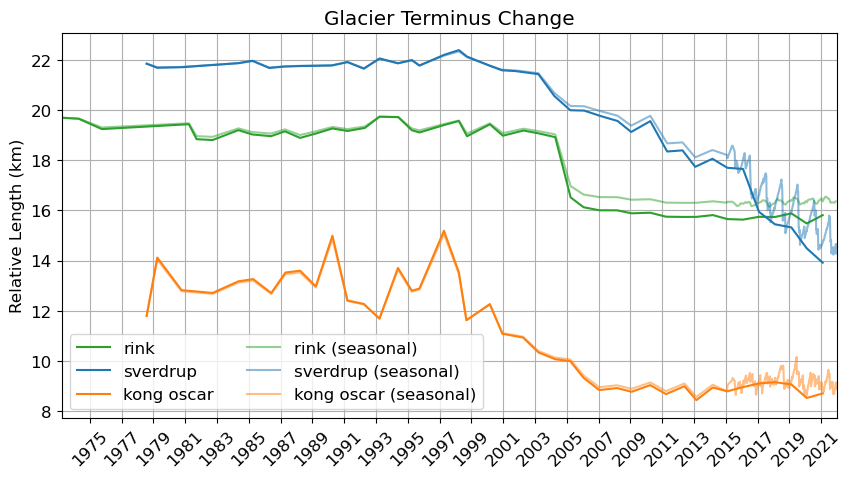

In [66]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_annual_df.date, rink_annual_df['length (km)'], label='rink', color='tab:green')
plt.plot(sver_annual_df.date, sver_annual_df['length (km)'], label='sverdrup', color='tab:blue')
plt.plot(ko_annual_df.date, ko_annual_df['length (km)'], label='kong oscar', color='tab:orange')

## the annual and seasonal length measurments are on different relative length scales (i.e., the starting magnitude is different)
# so we need to match the two datasets

# subtract difference
rink_diff = rink_annual_df['length (km)'][0] - rink_seasonal_df['length (km)'][0]
sver_diff = sver_annual_df['length (km)'][0] - sver_seasonal_df['length (km)'][0]
ko_diff = ko_annual_df['length (km)'][0] - ko_seasonal_df['length (km)'][0]

# rink_seasonal_df_adjust = rink_seasonal_df['length (km)'] + rink_diff
# sver_seasonal_df_adjust = sver_seasonal_df['length (km)'] + sver_diff
# ko_seasonal_df_adjust = ko_seasonal_df['length (km)'] + ko_diff

plt.plot(rink_seasonal_df.date, rink_seasonal_df['length (km)']+rink_diff, '-', markersize=3, label='rink (seasonal)', color='tab:green', alpha=0.5)
plt.plot(sver_seasonal_df.date, sver_seasonal_df['length (km)']+sver_diff, '-', markersize=3, label='sverdrup (seasonal)', color='tab:blue', alpha=0.5)
plt.plot(ko_seasonal_df.date, ko_seasonal_df['length (km)']+ko_diff, '-', markersize=3, label='kong oscar (seasonal)', color='tab:orange', alpha=0.5)

# plt.plot(rink_seasonal_df.date[37:], rink_seasonal_df['length (km)'][37:]-rink_annual_df['length (km)'][37], '-o', markersize=3, label='rink', color='tab:green')
# plt.plot(sver_seasonal_df.date[34:], sver_seasonal_df['length (km)'][34:]-sver_annual_df['length (km)'][37], '-o', markersize=3, label='sverdrup', color='tab:blue')
# plt.plot(ko_seasonal_df.date[35:], ko_seasonal_df['length (km)'][35:]-ko_annual_df['length (km)'][37], '-o', markersize=3, label='kong oscar', color='tab:orange')

plt.title('Glacier Terminus Change')
plt.ylabel("Relative Length (km)")
years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend(loc='lower left',ncol=2)
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

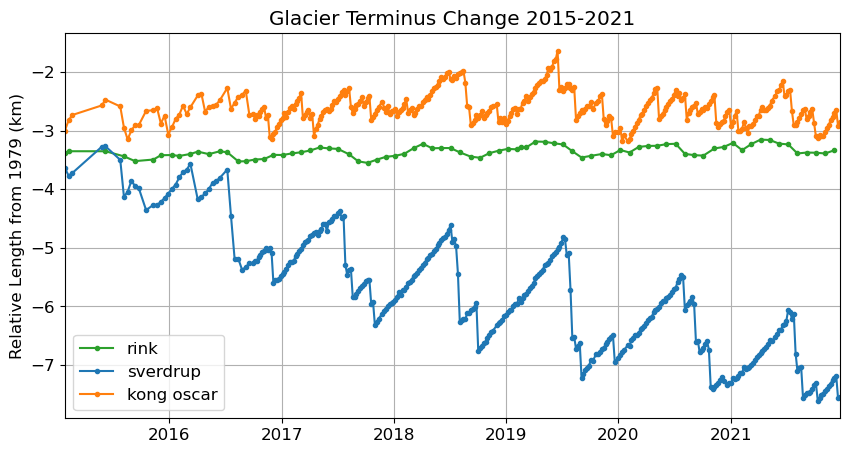

In [67]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_seasonal_df.date[37:], rink_seasonal_df['length (km)'][37:]-rink_seasonal_df['length (km)'][0], '-o', markersize=3, label='rink', color='tab:green')
plt.plot(sver_seasonal_df.date[34:], sver_seasonal_df['length (km)'][34:]-sver_seasonal_df['length (km)'][0], '-o', markersize=3, label='sverdrup', color='tab:blue')
plt.plot(ko_seasonal_df.date[35:], ko_seasonal_df['length (km)'][35:]-ko_seasonal_df['length (km)'][0], '-o', markersize=3, label='kong oscar', color='tab:orange')

plt.title('Glacier Terminus Change 2015-2021')
plt.ylabel("Relative Length from 1979 (km)")
# years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
# plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

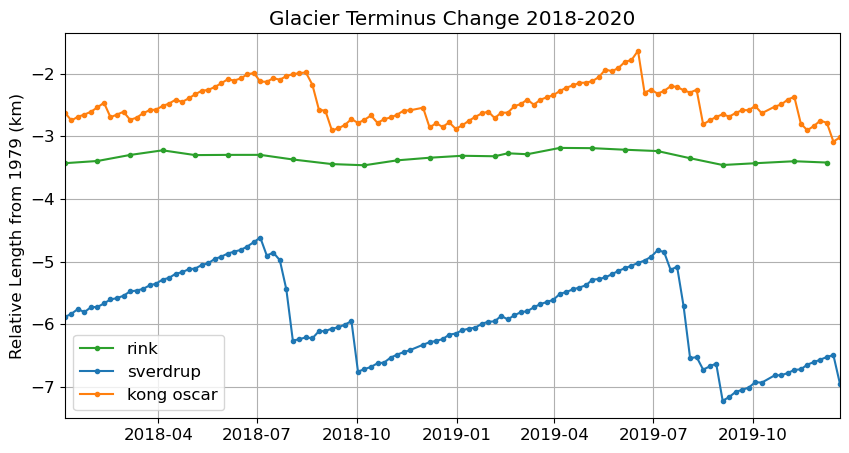

In [73]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_seasonal_df.date[68:93], rink_seasonal_df['length (km)'][68:93]-rink_seasonal_df['length (km)'][0], '-o', markersize=3, label='rink', color='tab:green')
plt.plot(sver_seasonal_df.date[147:265], sver_seasonal_df['length (km)'][147:265]-sver_seasonal_df['length (km)'][0], '-o', markersize=3, label='sverdrup', color='tab:blue')
plt.plot(ko_seasonal_df.date[148:266], ko_seasonal_df['length (km)'][148:266]-ko_seasonal_df['length (km)'][0], '-o', markersize=3, label='kong oscar', color='tab:orange')

plt.title('Glacier Terminus Change 2018-2020')
plt.ylabel("Relative Length from 1979 (km)")
# years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
# plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

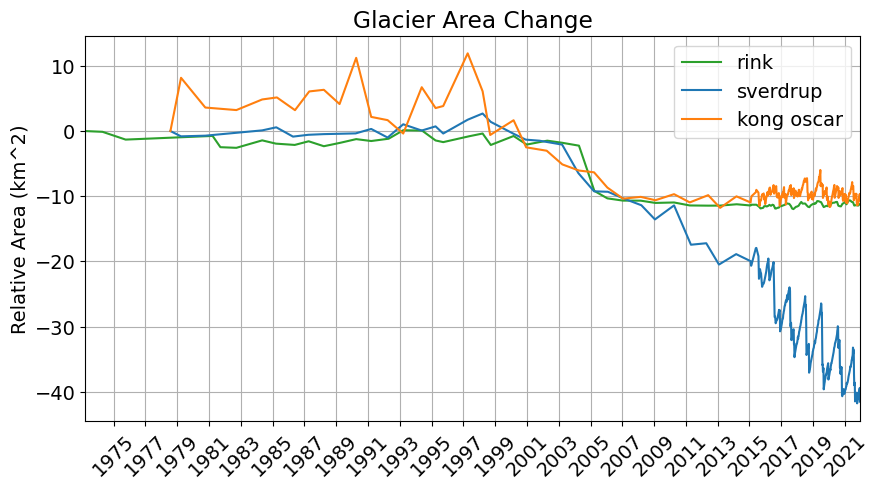

In [4]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_seasonal_df.date, rink_seasonal_df['area (km2)']-rink_seasonal_df['area (km2)'][0], label='rink', color='tab:green')
plt.plot(sver_seasonal_df.date, sver_seasonal_df['area (km2)']-sver_seasonal_df['area (km2)'][0], label='sverdrup', color='tab:blue')
plt.plot(ko_seasonal_df.date, ko_seasonal_df['area (km2)']-ko_seasonal_df['area (km2)'][0], label='kong oscar', color='tab:orange')

plt.title('Glacier Area Change')
plt.ylabel("Relative Area (km^2)")
years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_area.png", bbox_inches='tight', dpi=300, facecolor='white')

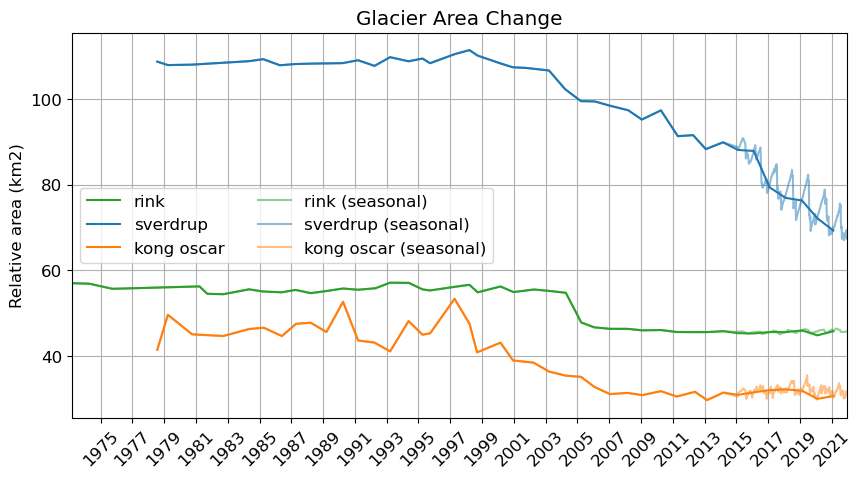

In [68]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_annual_df.date, rink_annual_df['area (km2)'], label='rink', color='tab:green')
plt.plot(sver_annual_df.date, sver_annual_df['area (km2)'], label='sverdrup', color='tab:blue')
plt.plot(ko_annual_df.date, ko_annual_df['area (km2)'], label='kong oscar', color='tab:orange')

plt.plot(rink_seasonal_df.date, rink_seasonal_df['area (km2)'], '-', markersize=3, label='rink (seasonal)', color='tab:green', alpha=0.5)
plt.plot(sver_seasonal_df.date, sver_seasonal_df['area (km2)'], '-', markersize=3, label='sverdrup (seasonal)', color='tab:blue', alpha=0.5)
plt.plot(ko_seasonal_df.date, ko_seasonal_df['area (km2)'], '-', markersize=3, label='kong oscar (seasonal)', color='tab:orange', alpha=0.5)

plt.title('Glacier Area Change')
plt.ylabel("Relative area (km2)")
years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend(loc='best',ncol=2)
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_area.png", bbox_inches='tight', dpi=300, facecolor='white')

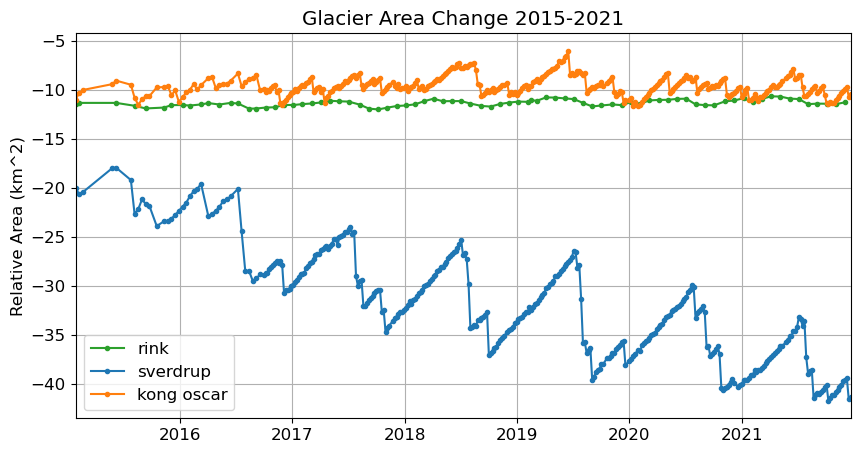

In [70]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_seasonal_df.date[37:], rink_seasonal_df['area (km2)'][37:]-rink_seasonal_df['area (km2)'][0], '-o', markersize=3, label='rink', color='tab:green')
plt.plot(sver_seasonal_df.date[34:], sver_seasonal_df['area (km2)'][34:]-sver_seasonal_df['area (km2)'][0], '-o', markersize=3, label='sverdrup', color='tab:blue')
plt.plot(ko_seasonal_df.date[35:], ko_seasonal_df['area (km2)'][35:]-ko_seasonal_df['area (km2)'][0], '-o', markersize=3, label='kong oscar', color='tab:orange')

plt.title('Glacier Area Change 2015-2021')
plt.ylabel("Relative Area (km^2)")
# years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
# plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

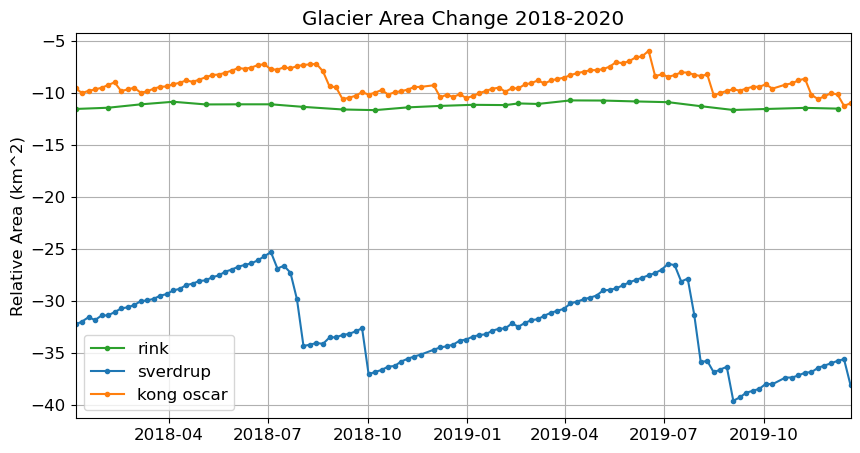

In [63]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size'] = 12

plt.plot(rink_seasonal_df.date[68:93], rink_seasonal_df['area (km2)'][68:93]-rink_seasonal_df['area (km2)'][0], '-o', markersize=3, label='rink', color='tab:green')
plt.plot(sver_seasonal_df.date[147:265], sver_seasonal_df['area (km2)'][147:265]-sver_seasonal_df['area (km2)'][0], '-o', markersize=3, label='sverdrup', color='tab:blue')
plt.plot(ko_seasonal_df.date[148:266], ko_seasonal_df['area (km2)'][148:266]-ko_seasonal_df['area (km2)'][0], '-o', markersize=3, label='kong oscar', color='tab:orange')

plt.title('Glacier Area Change 2018-2020')
plt.ylabel("Relative Area (km^2)")
# years = pd.period_range(np.datetime64('1973'), freq='2Y', periods=49).strftime('%Y').tolist()
# plt.xticks(years, years, rotation=45, horizontalalignment = 'center')
plt.legend()
plt.margins(x=0)
plt.grid()

# plt.savefig("figures/Glacier_plots/glacier_length.png", bbox_inches='tight', dpi=300, facecolor='white')

### Chlorophyll

In [90]:
tmp = xr.open_dataset('C:/Users/marie/Downloads/erdMH1chla1day_4d39_046d_a5c8_U1667863411397.nc')

In [ ]:
tmp

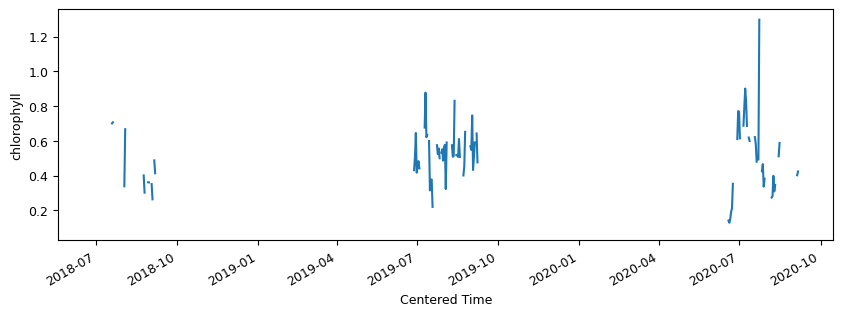

In [91]:
#Sverdrup - 75.5413, 58.410533
tmp.sel(latitude=slice(76.8, 75), longitude=slice(-59,-58)).chlorophyll.mean(dim=['latitude', 'longitude']).plot(figsize=[10,3])

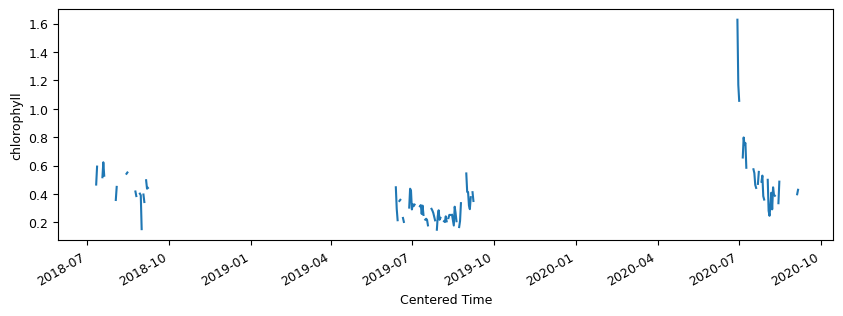

In [93]:
#Melville Bay
tmp.sel(longitude=slice(-61.5,-60.5), latitude=slice(75.5,75)).chlorophyll.mean(dim=['latitude', 'longitude']).plot(figsize=[10,3])